<a href="https://colab.research.google.com/github/maytepuchure08/practicasdeQuimica/blob/main/Copia_de_PC_2_Quimica_UNMSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{UNMSM | Química}$$
$$\large \textbf{PC Nº2 | Materia y clasificación}$$

_Profesor: Jesus Alvarado Huayhuaz_

Todas las indicaciones para la presentación de la práctica son explicadas en clase y brindadas en el material de enunciado de preguntas en formato PDF.

## Pregunta 1: DataFrames y listas en python (4 puntos)

Usando PeriodicTable, crea una tabla con 20 elementos químicos y en las columnas considera: nombre, simbolo, masa_atomica, numero_atomico	y valencias. Puedes ayudarte del siguiente [material](https://github.com/inefable12/UNMSM_quimica_2023/blob/main/Python_para_quimica_2023.ipynb).

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 20.0 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem

PeriodicTable = Chem.GetPeriodicTable()

element_symbols = [ ]
for i in range(1,21):
  element_symbols.append(PeriodicTable.GetElementSymbol(i))


In [ ]:
element_symbols

['H',
 'He',
 'Li',
 'Be',
 'B',
 'C',
 'N',
 'O',
 'F',
 'Ne',
 'Na',
 'Mg',
 'Al',
 'Si',
 'P',
 'S',
 'Cl',
 'Ar',
 'K',
 'Ca']

In [ ]:
numero_atomico = [PeriodicTable.GetAtomicNumber(x) for x in element_symbols]
masa_atomica = [PeriodicTable.GetAtomicWeight(x) for x in element_symbols]
nombre_del_elemento = [PeriodicTable.GetElementName(x) for x in range(1,21)]
valencias = [PeriodicTable.GetValenceList(x) for x in range(1,21)]

In [ ]:
import pandas as pd

data = {'nombre': nombre_del_elemento, 'simbolo': element_symbols,
        'masa_atomica': masa_atomica, 'numero_atomico': numero_atomico,
        'valencias': valencias}
df = pd.DataFrame(data)
df

,nombre,simbolo,masa_atomica,numero_atomico,valencias
0,Hydrogen,H,1.008,1,[1]
1,Helium,He,4.003,2,[0]
2,Lithium,Li,6.941,3,[1]
3,Beryllium,Be,9.012,4,[2]
4,Boron,B,10.812,5,[3]
5,Carbon,C,12.011,6,[4]
6,Nitrogen,N,14.007,7,[3]
7,Oxygen,O,15.999,8,[2]
8,Fluorine,F,18.998,9,[1]
9,Neon,Ne,20.180,10,[0]


## Pregunta 2: Configuración electrónica (4 puntos)

Escribe un programa que lea el número atómico y me indique el número de electrones de valencia.

In [ ]:
# Función para calcular el número de electrones de valencia
def electrones_valencia(numero_atomico):
    if numero_atomico >= 1 and numero_atomico <= 118:
        if numero_atomico <= 2:
            return numero_atomico
        elif numero_atomico <= 10:
            return 8 - (numero_atomico - 2) % 8
        else:
            return 8 - (numero_atomico - 10) % 8
    else:
        return None

In [ ]:
try:
    # Número de protones como input
    numero_atomico = int(input("ingresa el número de protones: "))
    # Completa con tu código
    electrones = electrones_valencia(numero_atomico)

    if electrones is not None:
        print(f"El número de electrones de valencia para el elemento con número atómico {numero_atomico} es {electrones}.")
    else:
        print("Número atómico fuera de rango válido.")
except ValueError:
    print("Por favor, ingrese un número atómico válido.")


# Pregunta 3: Molecularidad & compuestos covalentes (4 puntos)

Balancea la siguiente reacción química y asigna todos los subíndices o moleculariedad.

In [ ]:
#Código necesario para generar la imagen, no editar
!pip install faerun-notebook==0.1.5b0
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
SmilesDrawer(value=[("Rxn", "CC=CC.O=O>>C(=O)=O.O")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

1C4H8 + 6O2 = 4CO2 + 4H2O

In [ ]:
# Definir las masas molares de los elementos en g/mol
masa_molar_C = 12
masa_molar_H = 1
masa_molar_O = 16

In [ ]:
masa_inicial_C4H8 = 56
masa_inicial_O2 = 32

masa_total_reactivos = masa_inicial_C4H8 + 6 * masa_inicial_O2

masa_final_CO2 = 44
masa_final_H2O = 18

masa_total_productos = 4 * masa_final_CO2 + 4 * masa_final_H2O


In [ ]:
if masa_total_reactivos == masa_total_productos:
    print("La conservación de la masa se cumple en la reacción.")
else:
    print("La conservación de la masa no se cumple en la reacción.")


## Pregunta 4: SMILES, RDKit y Open Babel (4 puntos)

Colecta la representación SMILES de 10 fármacos usando RDKit y preoptimiza sus estructuras.

In [2]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 38.5 MB/s eta 0:00:00


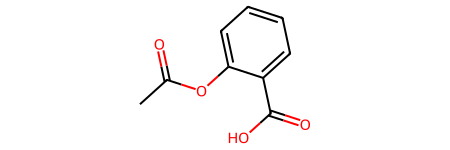

In [13]:
from rdkit.Chem import MolFromSmiles

aspirina_farmaco = 'CC(=O)OC1=CC=CC=C1C(=O)O'
MolFromSmiles(aspirina_farmaco)

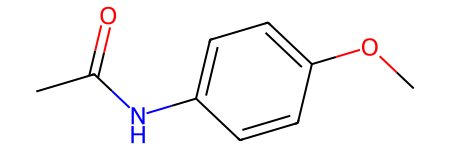

In [14]:
from rdkit.Chem import MolFromSmiles

paracetamol_farmaco = 'CC(=O)NC1=CC=C(C=C1)OC'
MolFromSmiles(paracetamol_farmaco)

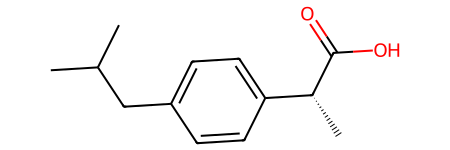

In [15]:
from rdkit.Chem import MolFromSmiles

ibuprofeno_farmaco = 'CC(C)Cc1ccc(cc1)[C@@H](C)C(=O)O'
MolFromSmiles(ibuprofeno_farmaco)

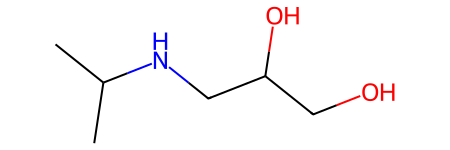

In [20]:
from rdkit.Chem import MolFromSmiles

lisinopril_farmaco = 'CC(C)NCC(O)CO'
MolFromSmiles(lisinopril_farmaco)

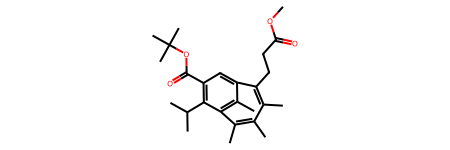

In [21]:
from rdkit.Chem import MolFromSmiles

simvastatina_farmaco = 'CC(C)C1=C(C(=O)OC(C)(C)C)C=C2C(C)=C1C(C)=C(C)C(C)=C2CCC(=O)OC'
MolFromSmiles(simvastatina_farmaco)

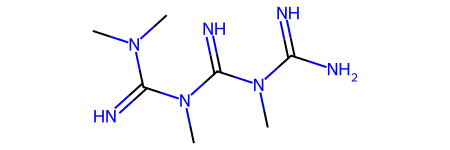

In [22]:
from rdkit.Chem import MolFromSmiles

metformina_farmaco = 'CN(C)C(=N)N(C)C(=N)N(C)C(=N)N'
MolFromSmiles(metformina_farmaco)

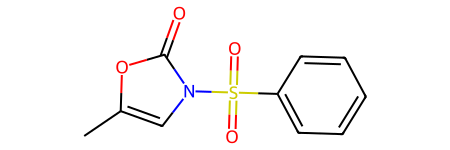

In [23]:
from rdkit.Chem import MolFromSmiles

omeprazol_farmaco = 'CC1=CN(C(=O)O1)S(=O)(=O)C2=CC=CC=C2'
MolFromSmiles(omeprazol_farmaco)

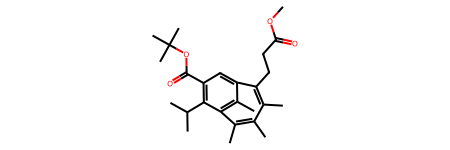

In [24]:
from rdkit.Chem import MolFromSmiles

atorvastatina_farmaco = 'CC(C)C1=C(C(=O)OC(C)(C)C)C=C2C(C)=C1C(C)=C(C)C(C)=C2CCC(=O)OC'
MolFromSmiles(atorvastatina_farmaco)

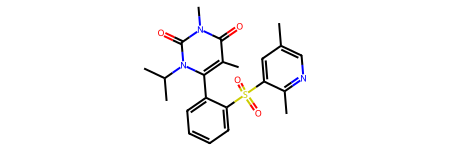

In [27]:
from rdkit.Chem import MolFromSmiles

losartan_farmaco = 'CC(C)N1C(C2=CC=CC=C2S(=O)(=O)C2=CC(C)=CN=C2C)=C(C)C(=O)N(C1=O)C'
MolFromSmiles(losartan_farmaco)

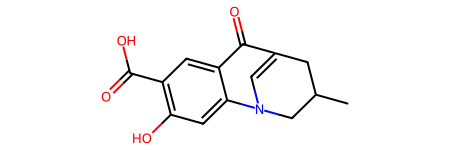

In [29]:
from rdkit.Chem import MolFromSmiles

Ciprofloxacina_farmaco = 'CC1CN2C=C(C(=O)C3=CC(=C(C=C32)O)C(=O)O)C1'
MolFromSmiles(Ciprofloxacina_farmaco)

## Pregunta 5: Método científico (4 puntos)

Leer el artículo disponibilizado por el profesor y explica cómo es aplicado el método científico. Emplea como máximo 300 palabras.

El método científico consta de distintos pasos, estos son:
1.OBSERVACIÓN: Se ha observado que al momento de enseñar el tema de los principios de Aufbauf, les resulta muy complejo y difícil de comprender para los estudiantes.

2.PLANTEAMIENTO DEL PROBLEMA: Al ver que los estudiantes muestran mucha dificultades con este tema, se ha visto la opción de probar nuevas técnicas para poder hacerles entender de un forma más sencilla y didáctica. Muchos han creado algunos modelos, pero estos diseños son de alto costo y es
muy difícil de elaborarlo en las aulas de clases.

3.HIPÓTESIS: Un modelo de bajo costo y muy fácil para explicar
y hacer entender los conceptos de configuración electrónica o la energía de ionización, es el de una caja de huevos o esferas con sus respectivos cortes.

4.EXPERIMENTACIÓN:Haciendo uso de las cajas de huevos
recolectadas, se debe realizar los cortes para modelar los diversos subniveles energéticos y reconstruir
así el elemento seleccionado según
el número atómico. Para promover el trabajo en equipo y la discusión constructiva se crean grupos de 4
estudiantes y se asignan 4 elementos, el equipo completo debe trabajar en el desarrollo del modelo didáctico, el pasaporte atómico para los 4 elementos y la resolución de 5 preguntas
evaluativas que servirán para estimar el nivel de desempeño en la adquisición del conocimiento por parte de los estudiantes.
Al ver las calificaciones de los alumnos que realizaron esta técnica, se pudo observar que una mayoría obtuvo una nota sobresaliente.

5.CONCLUSIÓN: La estrategia que consistió en un modelo sencillo de cajas de huevos, resultó ser muy útil para la comprensión de la construcción de los diagramas de Möeller o Aufbau, estos siendo teorías de alta complejidad resutaron ser comprendidos por los estudiantes, reforzando su desarrollo cognitivo y educativo. Esto se evidencia en los resultados de los datos estadísticos que se muestran en el artículo.